---
title: "Exercises"
execute:
  freeze: auto  # re-render only when source changes
jupyter: python3
---

Import relevant packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Plot monthly rainfall for your station.  

Load the data into a dataframe, and before you continue with the analysis, plot the rainfall data, to see how it looks like.  

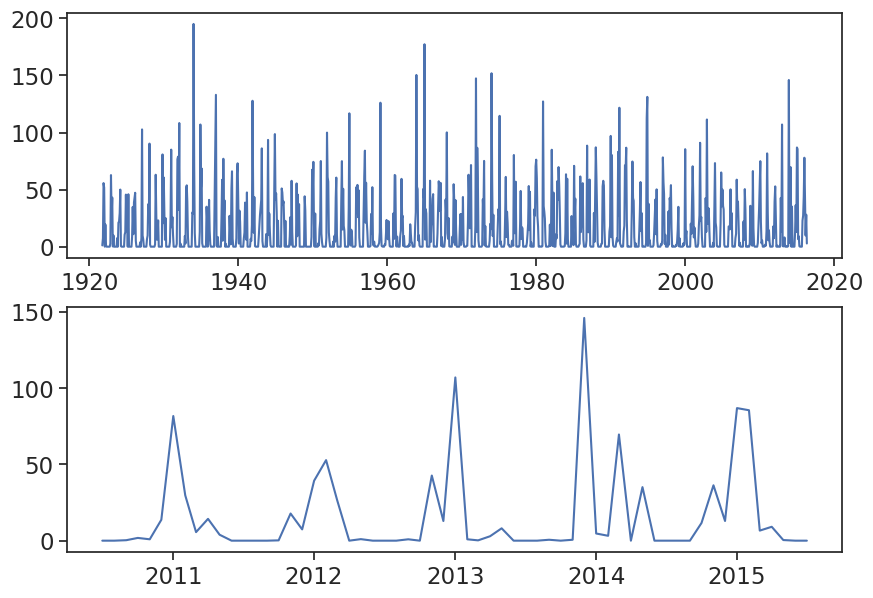

In [9]:
df = pd.read_csv('BEN_GURION_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
ax1.plot(df['PRCP'])
ax2.plot(df['PRCP']['2010-07-01':'2015-07-01'])

How to aggregate rainfall accoding to the hydrological year? We use the function `resample`.

read more about resampling options:  
<https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#offset-aliases>

also, annual resampling can be anchored to the end of specific months:
<https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#anchored-offsets>

In [10]:
# annual frequency, anchored 31 December
df_year_all = df['PRCP'].resample('YE').sum().to_frame()
# annual frequency, anchored 01 January
df_year_all = df['PRCP'].resample('YS').sum().to_frame()
# annual frequency, anchored end of September
df_year_all = df['PRCP'].resample('YE-SEP').sum().to_frame()
# rename 'PRCP' column to 'rain (mm)'
df_year_all.columns = ['rain (mm)']
df_year_all

,rain (mm)
DATE,
1922-09-30,136.6
1923-09-30,144.5
1924-09-30,130.4
1925-09-30,165.3
1926-09-30,188.7
...,...
2012-09-30,145.7
2013-09-30,175.3
2014-09-30,259.2


You might need to exclude the first or the last line, since their data might have less that 12 months. For example:

In [11]:
# exclude 1st row
df_year = df_year_all.iloc[1:]
# exclude last row
df_year = df_year_all.iloc[:-1]
# exclude both 1st and last rows
df_year = df_year_all.iloc[1:-1]
df_year

,rain (mm)
DATE,
1923-09-30,144.5
1924-09-30,130.4
1925-09-30,165.3
1926-09-30,188.7
1927-09-30,130.2
...,...
2011-09-30,151.6
2012-09-30,145.7
2013-09-30,175.3


Calculate the average annual rainfall. Plot annual rainfall for the whole range, together with the average. You should get something like this:

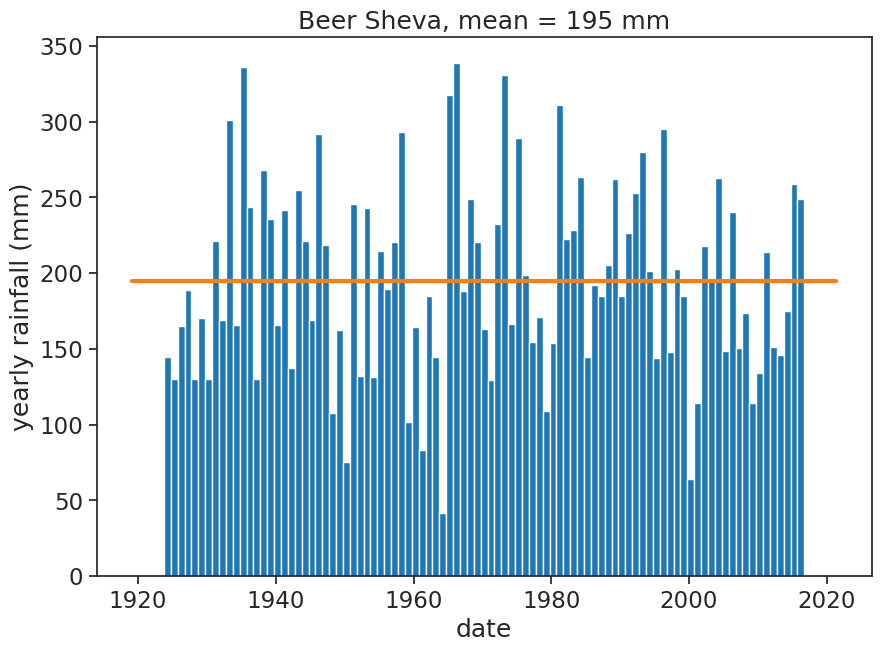

In [12]:
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY precipitation
ax.bar(df_year.index, df_year['rain (mm)'],
       width=365, align='edge', color="tab:blue")

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(ax.get_xlim(), [rain_mean]*2, linewidth=3, color="tab:orange")
ax.set(xlabel="date",
       ylabel="yearly rainfall (mm)",
       title=f"Beer Sheva, mean = {rain_mean:.0f} mm");
# save figure
# plt.savefig("hydrology_figures/beersheva_yearly_rainfall_1923_2016.png")

Plot a histogram of annual rainfall, with the mean and standard deviation. Calculate the coefficient of variation. Try to plot something like this:

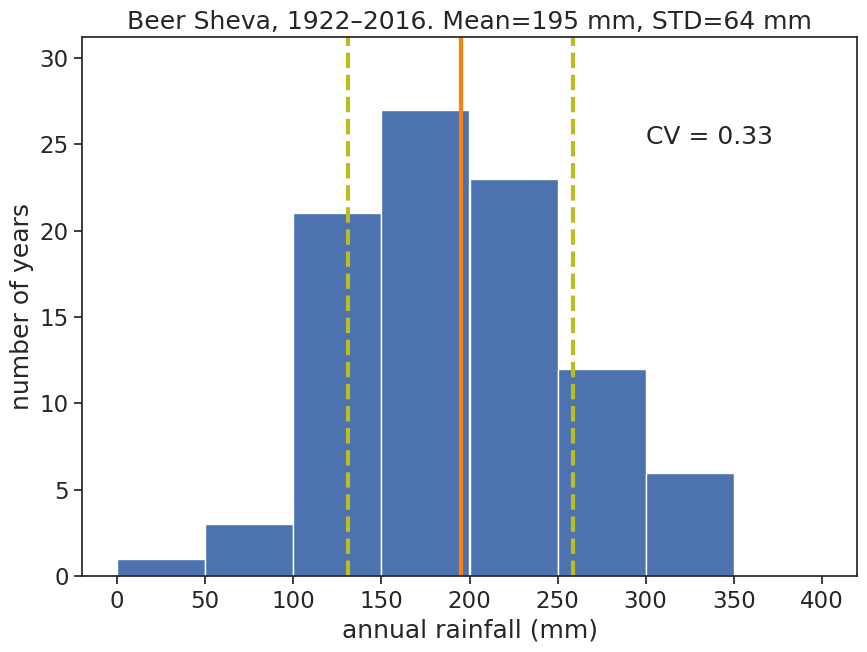

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

# calculate mean and standard deviation
rain_mean = df_year['rain (mm)'].mean()
rain_std = df_year['rain (mm)'].std()

# plot histogram
b = np.arange(0, 401, 50)  # bins from 0 to 400, width = 50
ax.hist(df_year['rain (mm)'], bins=b)

# plot vertical lines with mean, std, etc
ylim = np.array(ax.get_ylim())
ylim[1] = ylim[1]*1.1
ax.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax.set(ylim=ylim,
       xlabel="annual rainfall (mm)",
       ylabel="number of years",
       title=f"Beer Sheva, 1922–2016. Mean={rain_mean:.0f} mm, STD={rain_std:.0f} mm")
ax.text(300, 25, f"CV = {rain_std/rain_mean:.2f}")
plt.savefig("histogram_beersheva.png")

Calculate the mean annual rainfall for various 30-year intervals

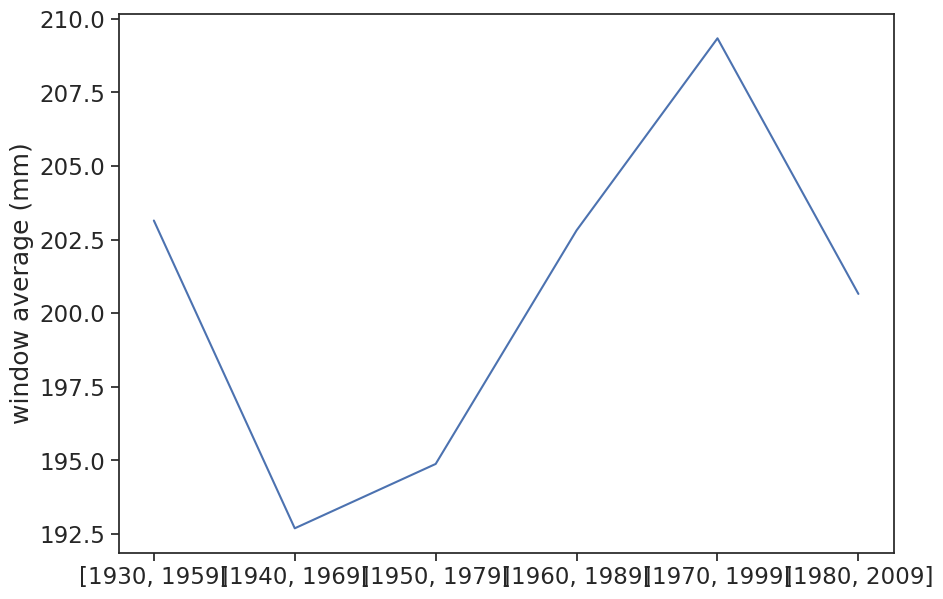

In [14]:
####### the hard way #######
# fig, ax = plt.subplots(figsize=(10,7))

# mean_30_59 = df_year.loc['1930-09-30':'1959-09-01','rain (mm)'].mean()
# mean_40_69 = df_year.loc['1940-09-30':'1969-09-01','rain (mm)'].mean()
# mean_50_79 = df_year.loc['1950-09-30':'1979-09-01','rain (mm)'].mean()
# mean_60_89 = df_year.loc['1960-09-30':'1989-09-01','rain (mm)'].mean()
# mean_70_99 = df_year.loc['1970-09-30':'1999-09-01','rain (mm)'].mean()
# mean_80_09 = df_year.loc['1980-09-30':'2009-09-01','rain (mm)'].mean()

# ax.plot([mean_30_59,
#          mean_40_69,
#          mean_50_79,
#          mean_60_89,
#          mean_70_99,
#          mean_80_09])


####### the easy way #######

fig, ax = plt.subplots(figsize=(10,7))

# use list comprehension
windows = [[x, x+29] for x in [1930,1940,1950,1960,1970,1980]]
mean = [df_year.loc[f'{w[0]:d}-09-30':f'{w[1]:d}-09-01','rain (mm)'].mean() for w in windows]
ax.plot(mean)
ax.set(xticks=np.arange(len(mean)),
       xticklabels=[str(w) for w in windows],
       ylabel="window average (mm)"
      );

## homework

1. Download both daily and monthly data for London (LONDON HEATHROW, ID: UKM00003772). You should be aware that 'PRCP' for monthly data is in millimeters, while 'PRCP' for daily data is in **tens of millimiters**.
2. Aggregate daily data into monthly intervals using resample('MS').sum(). 'MS' means that the sum of all days in the month will be stored in the first day of the month. Supposedly both datasets are equal now.
3. Calculate the average annual rainfall, using each of these datasets.
4. Why is there such a big difference?